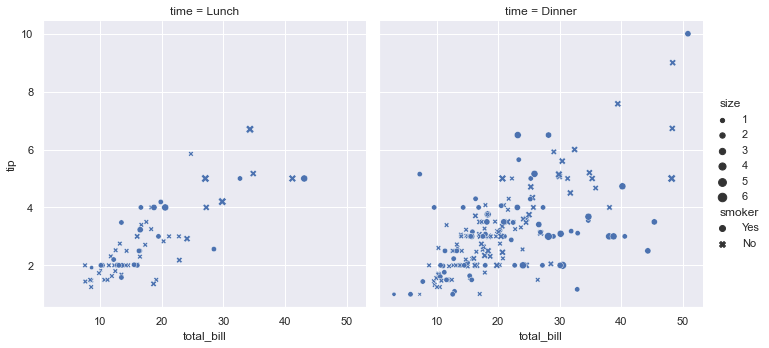

In [2]:
import os
import sys
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sys.version
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed
from tqdm import tqdm

sns.set_theme()
tips = sns.load_dataset("tips")
tips.head()
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    style="smoker", size="size",
)



def generate_dataframe(excel_path):
    xl_file = pd.ExcelFile(excel_path)
    
    print ("Radiologists:", xl_file.sheet_names)

    dfs = []
    for rater in xl_file.sheet_names:
        df_rater = xl_file.parse(rater)
        df_rater["Radiologist"] = rater

        dfs.append(df_rater)

    df = pd.concat(dfs)
    
    print ("N Cases:", len(df["ID"].unique()))
    return df

In [3]:
df = generate_dataframe("JayaTexturePrePancreas.xlsx")

Radiologists: ['Burcin', 'Maria', 'Natally', 'Onur']
N Cases: 89


In [5]:
import re
#da = df.columns.str.contains("LBP") | df.columns.str.contains("Radiologist")
df1 = df.filter(like='LBP', axis=1)  
df_fd1 = df.filter(like='ACM', axis=1) 
df_fd2 = df.filter(like='FD', axis=1)  


len(df_fd1)
df2 =  df.filter(like='Radiologist', axis=1)  
df3 = df.filter(like = 'ID', axis=1)



#Features are only LBP
features=list(df1.columns)
features_acm = list(df_fd1.columns)
features_fd = list(df_fd2.columns)



In [6]:
frames = pd.concat([df1, df2, df3], axis=1)
frames_acm = pd.concat([df_fd1, df2, df3], axis=1)
frames_fd = pd.concat([df_fd2, df2, df3], axis=1)

In [ ]:
frames_acm.to_csv('out.csv')

In [ ]:
#More info on columns
#f = df.columns
#df_columns = pd.DataFrame(f, columns=['Columns'])
#df.to_csv("Columns_info.csv")
#os.getcwd()

In [9]:
data = pg.read_dataset('icc')
#type(frames)
#print (features[1])
type(data)
#frames = frames.dropna()
#frames = frames.reset_index(drop=True)
#frames.isnull().to_csv('One1.csv')
#icc_res = pg.intraclass_corr(data=data, targets='ID', raters='Radiologist', ratings=features)
#data.head
raters ='Radiologist'
ratings=features
ratings_acm = features_acm
ratings_fd = features_fd


targets='ID'

frames['ID'] = frames['ID'].str.replace("\'", "")
frames_acm['ID'] = frames_acm['ID'].str.replace("\'", "")
frames_fd['ID'] = frames_fd['ID'].str.replace("\'", "")



In [ ]:
frames['ID']

In [ ]:
type(frames)
#frames.replace(0, np.nan, inplace=True)
frames.to_csv('Rewrite.csv')

In [ ]:
#icc_res = pg.intraclass_corr(data=frames, targets='ID', raters='Radiologist', ratings=features)

In [ ]:
type(frames)

In [10]:

frames['ID'] =frames['ID'].str.replace("BAU_", "")
frames['ID'] =frames['ID'].str.replace("ME_", "")
frames['ID'] =frames['ID'].str.replace("_CORRECTED2", "")

In [11]:
frames_acm['ID'] =frames_acm['ID'].str.replace("BAU_", "")
frames_acm['ID'] =frames_acm['ID'].str.replace("ME_", "")
frames_acm['ID'] =frames_acm['ID'].str.replace("_CORRECTED2", "")

In [121]:
frames_fd['ID'] =frames_fd['ID'].str.replace("BAU_", "")
frames_fd['ID'] =frames_fd['ID'].str.replace("ME_", "")
frames_fd['ID'] =frames_fd['ID'].str.replace("_CORRECTED2", "")

#Select LBP features only
#features2 = pd.DataFrame(frames.columns[~frames.columns.str.contains("ID|Radiologist")])

features3 = frames.columns[frames.columns.str.contains("LBP")]
features_acm = frames_acm.columns[frames_acm.columns.str.contains("ACM")]
features_fd = frames_fd.columns[frames_fd.columns.str.contains("FD")]



type(frames_fd)
frames_fd.head()
features_fd
#features2.to_csv('Features.csv')

Index(['FD1_1', 'FD1_2', 'FD1_3', 'FD1_4', 'FD1_5', 'FD1_6', 'FD1_7', 'FD1_8',
       'FD1_9', 'FD1_10', 'FD1_11', 'FD1_12', 'FD1_13', 'FD1_14', 'FD1_15',
       'FD1_16', 'FD1_17', 'FD1_18', 'FD1_19', 'FD1_20', 'FD1_21', 'FD1_22',
       'FD1_23', 'FD1_24', 'FD1_25', 'FD1_26', 'FD1_27', 'FD1_28', 'FD1_29',
       'FD1_30', 'FD1_31', 'FD1_32', 'FD1_33', 'FD1_34', 'FD1_35', 'FD1_36',
       'FD1_37', 'FD1_38', 'FD1_39', 'FD1_40', 'FD1_41', 'FD1_42', 'FD1_43',
       'FD1_44', 'FD1_45', 'FD1_46', 'FD1_47', 'FD1_48', 'FD2_1', 'FD2_2',
       'FD2_3'],
      dtype='object')

In [ ]:
#icc_res = pg.intraclass_corr(data=frames, targets='ID', raters='Radiologist', ratings='LBP2')

In [128]:
def calculate_icc(df, feature, icc_type="ICC3"):
    icc_result = pg.intraclass_corr(data=df, targets='ID', raters='Radiologist', ratings=feature).round(4)
    icc = icc_result.set_index("Type").loc["ICC3"].ICC
    print (icc)
    return feature, icc



def run_features(df, features):
    #%%capture --no-display
    df_new = pd.DataFrame()

    for feature in features:
        print (feature)
    
        icc_result = pg.intraclass_corr(data=df, targets='ID', raters='Radiologist', ratings=feature).round(4)
        icc = icc_result.set_index("Type").loc["ICC3"].ICC

        print("{} for {}".format(feature, icc))
        new_row = pd.DataFrame({'Feature':feature, 'ICC':icc},index=[0]) 
        df_new = pd.concat([new_row,df_new.loc[:]]).reset_index(drop=True)

    return df_new
    
    

#acm = run_features(frames_acm, features_acm)
fd = run_features(frames_fd, features_fd)
#lbp = run_features(frames, features3)
#print(features3)
#lbp.to_csv('acm2.csv')
fd.to_csv('acm2.csv')
#df_lbp.to_csv('LBP.csv')

frames_fd.head()

FD1_1
FD1_1 for 0.809
FD1_2
FD1_2 for 0.7182
FD1_3


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., 

FD1_3 for 0.7397
FD1_4
FD1_4 for 0.8506
FD1_5
FD1_5 for 0.722
FD1_6
FD1_6 for 0.8545
FD1_7
FD1_7 for 0.8316
FD1_8
FD1_8 for 0.7265
FD1_9


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., 

FD1_9 for 0.8298
FD1_10
FD1_10 for 0.7942
FD1_11
FD1_11 for 0.73
FD1_12
FD1_12 for 0.8133
FD1_13
FD1_13 for 0.7889
FD1_14
FD1_14 for 0.7326
FD1_15


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resid = np.sum(grp_both.apply(lambda x: (x - x.mean()) ** 2))
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou

FD1_15 for 0.8551
FD1_16
FD1_16 for 0.7667
FD1_17
FD1_17 for 0.7351
FD1_18
FD1_18 for 0.7388
FD1_19
FD1_19 for 0.7211
FD1_20


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resid = np.sum(grp_both.apply(lambda x: (x - x.mean()) ** 2))
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou

FD1_20 for 0.7232
FD1_21
FD1_21 for 0.7007
FD1_22
FD1_22 for 0.738
FD1_23
FD1_23 for 0.7171
FD1_24
FD1_24 for 0.6991
FD1_25
FD1_25 for 0.7868

/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resid = np.sum(grp_both.apply(lambda x: (x - x.mean()) ** 2))
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou


FD1_26
FD1_26 for 0.6664
FD1_27
FD1_27 for 0.6236
FD1_28
FD1_28 for 0.8133
FD1_29
FD1_29 for 0.6967
FD1_30


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resid = np.sum(grp_both.apply(lambda x: (x - x.mean()) ** 2))
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou

FD1_30 for 0.8093
FD1_31
FD1_31 for 0.789
FD1_32
FD1_32 for 0.7125
FD1_33
FD1_33 for 0.6738
FD1_34
FD1_34 for 0.559
FD1_35
FD1_35 for 0.7261

/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resid = np.sum(grp_both.apply(lambda x: (x - x.mean()) ** 2))
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou


FD1_36
FD1_36 for 0.6971
FD1_37
FD1_37 for 0.7755
FD1_38
FD1_38 for 0.7316
FD1_39
FD1_39 for 0.7239
FD1_40
FD1_40 for 0.7738

/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., 


FD1_41
FD1_41 for 0.7343
FD1_42
FD1_42 for 0.7074
FD1_43
FD1_43 for 0.7201
FD1_44
FD1_44 for 0.7304
FD1_45


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., 

FD1_45 for 0.6921
FD1_46
FD1_46 for 0.7399
FD1_47
FD1_47 for 0.7175
FD1_48
FD1_48 for 0.6987
FD2_1
FD2_1 for 0.9281
FD2_2
FD2_2 for 0.6708
FD2_3


/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/mishrp03/miniconda3/lib/python3.9/site-packages/pingouin/parametric.py:1071: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(...,

FD2_3 for 0.7882


,FD1_1,FD1_2,FD1_3,FD1_4,FD1_5,FD1_6,FD1_7,FD1_8,FD1_9,FD1_10,...,FD1_44,FD1_45,FD1_46,FD1_47,FD1_48,FD2_1,FD2_2,FD2_3,Radiologist,ID
0,0.861004,80.611057,291.5,0.872240,81.413882,316.0,0.931883,87.399299,373.0,0.970570,...,109.798421,257.0,0.685781,120.607260,55.0,1.912988,0.381012,0.039664,Burcin,Case_01_pre_pancreas.mha
1,0.899980,80.727564,280.0,0.913875,81.237288,292.0,0.932443,81.924658,398.0,0.947017,...,86.606350,68.0,0.326605,97.160714,7.0,1.926907,0.354700,0.032449,Burcin,Case_03_pre_pancreas.mha
2,0.947450,91.141593,349.0,0.955445,94.337607,351.0,0.975494,101.305660,426.0,0.990038,...,125.936407,410.0,0.838196,139.303922,141.0,1.982164,0.366567,0.034354,Burcin,Case_04_pre_pancreas.mha
3,0.907536,115.226120,253.0,0.920905,115.146635,264.5,0.946885,120.665079,313.0,0.986404,...,143.825380,191.0,0.701805,160.374896,70.0,1.872172,0.401426,0.045921,Burcin,Case_05_pre_pancreas.mha
4,0.933892,23.521486,383.0,1.006400,24.363188,497.5,1.039585,25.352472,633.5,0.942003,...,29.677302,21.5,0.236491,34.000000,4.5,1.927616,0.350434,0.031165,Burcin,Case_06_pre_pancreas.mha


<AxesSubplot: xlabel='ICC', ylabel='Type'>

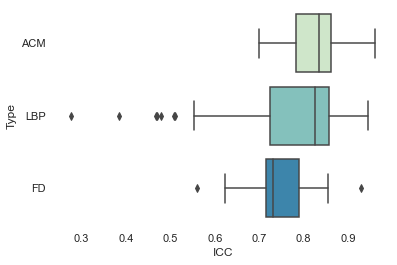

In [151]:
#executor = ProcessPoolExecutor(max_workers=4)
#features

#icc_result = pg.intraclass_corr(data=frames_acm, targets='ID', raters='Radiologist', ratings='ACM1_14').round(4)
#results = [executor.submit(calculate_icc, df, feature) for feature in features]
#df = sns.load_dataset("titanic")
#sns.boxplot(x=df["age"])

#df_lbp.head()

new_df = pd.DataFrame()
acm['Type'] ='ACM'
lbp['Type'] ='LBP'
fd['Type'] = 'FD'
new_df = pd.concat([acm, lbp,fd])
#df = sns.load_dataset("titanic")


custom_palette = sns.color_palette("GnBu", 3)
sns.set_palette(custom_palette)
#sns.palplot(custom_palette)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.boxplot(x=new_df["ICC"], y=new_df["Type"], palette=custom_palette)
#plt.savefig('TexturePrePancreas.png')
#new_df.to_csv('new.csv')

NameError: name 'd2' is not defined